In [36]:
import os
import time
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Dash modules
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import plotly.express as px

# Set up jupyter proxy
JupyterDash.infer_jupyter_proxy_config()

%matplotlib inline

In [4]:
# Getting all file paths

path = r'assets' # use your path
all_files = glob.glob(path + "/*.csv")

In [5]:
# Creating list to append all ticker dfs to
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concat all ticker dfs 
stock_df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
# Quick review of the df
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker
0,1990-02-16,0.0,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO
1,1990-02-20,0.0,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO
2,1990-02-21,0.0,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO
3,1990-02-22,0.0,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO
4,1990-02-23,0.0,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO


In [7]:
stock_df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
sector           object
ticker           object
dtype: object

In [8]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [9]:
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker
0,1990-02-16,0.000000,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO
1,1990-02-20,0.000000,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO
2,1990-02-21,0.000000,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO
3,1990-02-22,0.000000,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO
4,1990-02-23,0.000000,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO
...,...,...,...,...,...,...,...,...,...,...
328912,2021-05-28,239.220001,243.500000,237.830002,238.100006,17810800.0,0.0,0.0,Technology,CRM
328913,2021-06-01,238.000000,238.399994,232.460007,236.199997,8103900.0,0.0,0.0,Technology,CRM
328914,2021-06-02,234.399994,238.289993,233.899994,234.619995,5543900.0,0.0,0.0,Technology,CRM
328915,2021-06-03,232.889999,233.179993,229.429993,230.839996,5109000.0,0.0,0.0,Technology,CRM


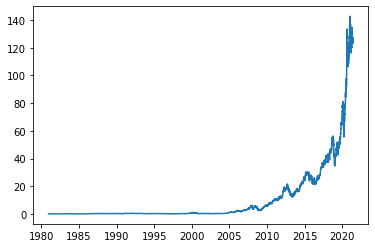

In [10]:
# Plotting one ticker to ensure data looks correct
plt.plot(stock_df[stock_df['ticker']=='AAPL']['Date'], stock_df[stock_df['ticker']=='AAPL']['Close'])

In [11]:
# Creating Moving Average Technical Indicator
# Using this aritcle https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb

stock_df['SMA_5'] = stock_df.groupby('ticker')['Close'].transform(lambda x: x.rolling(window = 5).mean())
stock_df['SMA_15'] = stock_df.groupby('ticker')['Close'].transform(lambda x: x.rolling(window = 15).mean())
stock_df['SMA_ratio'] = stock_df['SMA_15'] / stock_df['SMA_5']

In [12]:
stock_df.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker,SMA_5,SMA_15,SMA_ratio
0,1990-02-16,0.0,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN
1,1990-02-20,0.0,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN
2,1990-02-21,0.0,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN
3,1990-02-22,0.0,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN
4,1990-02-23,0.0,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO,0.058331,NaN,NaN
5,1990-02-26,0.0,0.059297,0.056719,0.056719,26928000.0,0.0,0.0,Technology,CSCO,0.058202,NaN,NaN
6,1990-02-27,0.0,0.058975,0.056719,0.058008,25574400.0,0.0,0.0,Technology,CSCO,0.057944,NaN,NaN
7,1990-02-28,0.0,0.061231,0.058008,0.059942,67968000.0,0.0,0.0,Technology,CSCO,0.058331,NaN,NaN
8,1990-03-01,0.0,0.060586,0.059297,0.059297,28425600.0,0.0,0.0,Technology,CSCO,0.058460,NaN,NaN
9,1990-03-02,0.0,0.060586,0.059297,0.059942,8438400.0,0.0,0.0,Technology,CSCO,0.058782,NaN,NaN


In [13]:
# Wilder smoothing is used to give more weight to more recent observations in moving averages
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

In [17]:
# Bollinger bands
stock_df['15MA'] = stock_df.groupby('ticker')['Close'].transform(lambda x: x.rolling(window=15).mean())
stock_df['SD'] = stock_df.groupby('ticker')['Close'].transform(lambda x: x.rolling(window=15).std())
stock_df['upperband'] = stock_df['15MA'] + 2*stock_df['SD']
stock_df['lowerband'] = stock_df['15MA'] - 2*stock_df['SD']

In [18]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker,SMA_5,SMA_15,SMA_ratio,15MA,SD,upperband,lowerband
0,1990-02-16,0.0,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-20,0.0,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02-21,0.0,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-02-22,0.0,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-02-23,0.0,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO,0.058331,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
stock_df[stock_df['ticker']=='CSCO']

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker,SMA_5,SMA_15,SMA_ratio,15MA,SD,upperband,lowerband
0,1990-02-16,0.000000,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-20,0.000000,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02-21,0.000000,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-02-22,0.000000,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-02-23,0.000000,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO,0.058331,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,2021-05-28,53.180000,53.220001,52.840000,52.900002,14863500.0,0.0,0.0,Technology,CSCO,53.086000,52.802000,0.994650,52.802000,0.431446,53.664893,51.939108
7881,2021-06-01,52.959999,53.320000,52.430000,52.619999,15741700.0,0.0,0.0,Technology,CSCO,52.932000,52.766000,0.996864,52.766000,0.421863,53.609727,51.922273
7882,2021-06-02,52.650002,52.990002,52.400002,52.959999,14529300.0,0.0,0.0,Technology,CSCO,52.862000,52.774667,0.998348,52.774667,0.424599,53.623864,51.925469
7883,2021-06-03,52.799999,53.560001,52.619999,53.330002,17593100.0,0.0,0.0,Technology,CSCO,52.946000,52.890000,0.998942,52.890000,0.299165,53.488331,52.291669


In [47]:
px.line(stock_df[stock_df['ticker']=='CSCO'], 
                     x="Date", 
                     y="Close")

In [53]:
available_indicators1 = list(stock_df['ticker'].unique())

In [68]:
# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__)

server = app.server

app.layout = html.Div([dcc.Graph(id='price_chart'),

            dcc.Dropdown(
                id='ticker',
                options=[{'label': i, 'value': i} for i in available_indicators1],
                value='CSCO' # the default is code_module AAA
            )])

# Callback to connect input(s) to output(s)
@app.callback(dash.dependencies.Output('price_chart','figure'),
    [dash.dependencies.Input('ticker','value')])

# Step 3: Define the graph with plotly express
def update_ticker(ticker):

    figure = px.line(stock_df[stock_df['ticker']==ticker], 
                     x="Date", 
                     y="Close")

    return figure

# Run app and display result inline in the notebook
app.run_server(mode="inline")